In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

In [25]:
ds=pd.read_csv('Credit Card Customer Data.csv')
ds.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
ds.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
ds.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [6]:
ds.drop(['Sl_No','Customer Key'], axis=1,inplace=True)

In [7]:
#ds['Customer Key'].head()

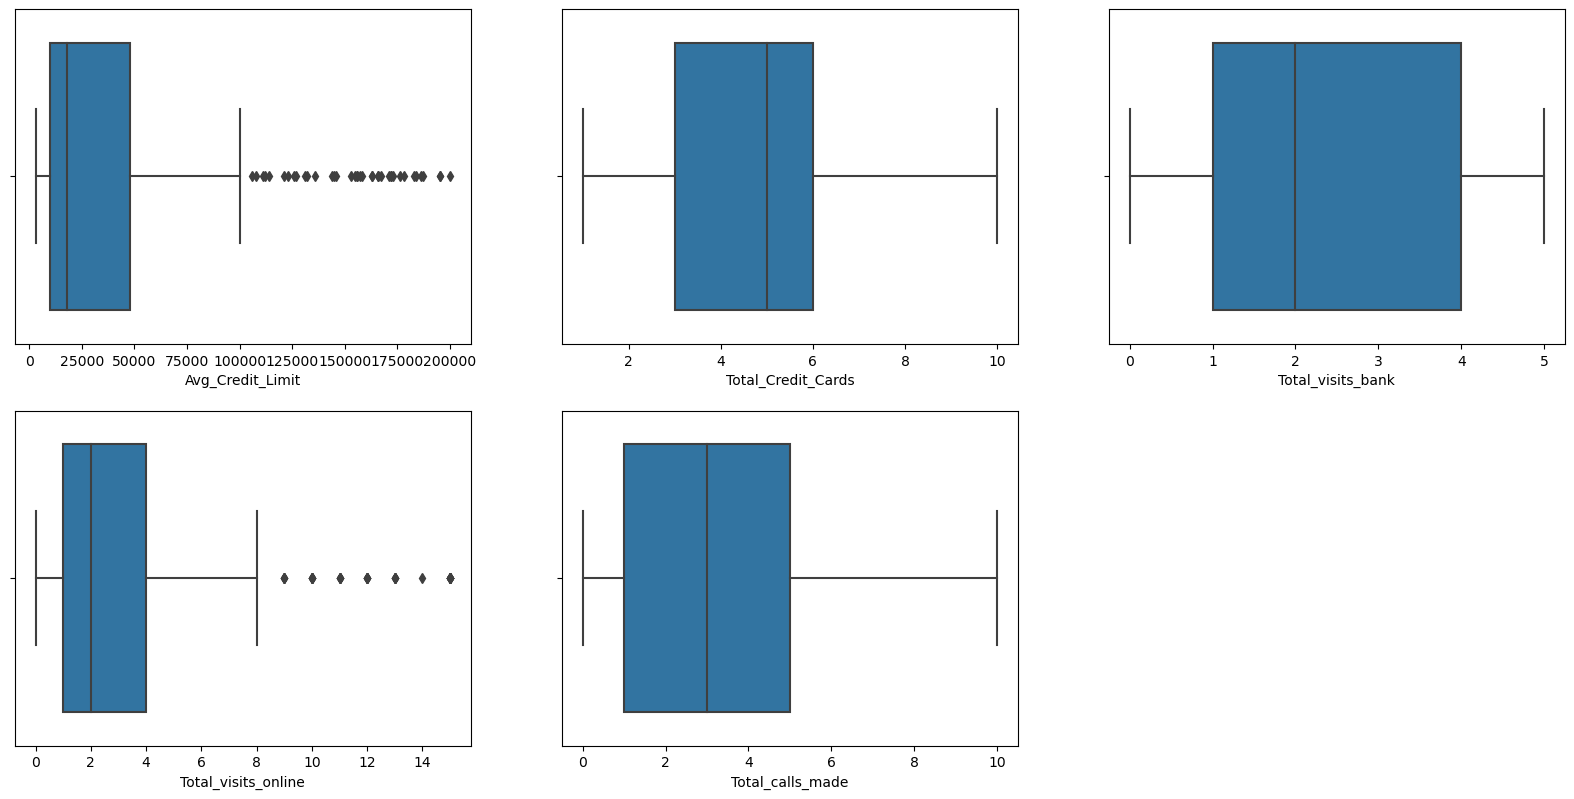

In [11]:
i=1
plt.figure(figsize=(20,20))
for j in ds.columns:
    plt.subplot(4,3,i)
    sns.boxplot(data=ds,x=j)
    i+=1

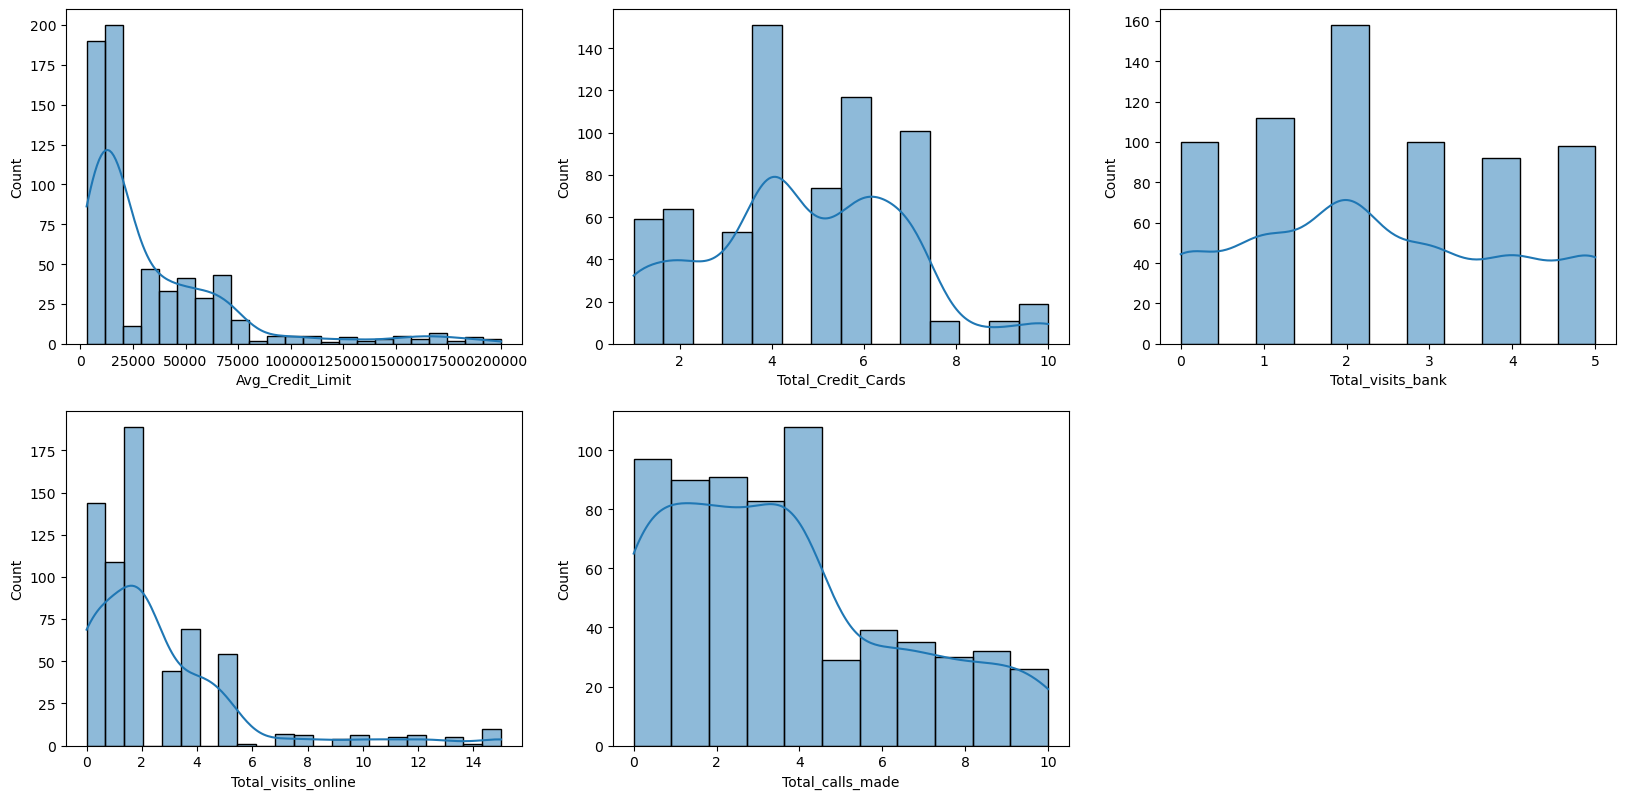

In [9]:
i=1
plt.figure(figsize=(20,20))
for j in ds.columns:
    plt.subplot(4,3,i)
    sns.histplot(data=ds,x=ds[j],kde=True)
    i+=1

In [10]:
ds.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


<Axes: >

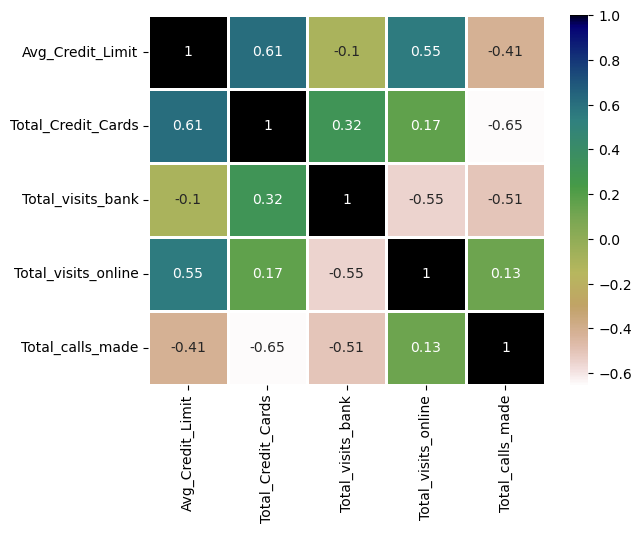

In [12]:
sns.heatmap(ds.corr(),cmap='gist_earth_r',linewidths=1,annot=True)

In [19]:
sc=StandardScaler()
scaled=sc.fit_transform(ds)
scaled_data=pd.DataFrame(scaled,columns=ds.columns)
scaled_data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-1.729428,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-1.724180,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.718931,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-1.713683,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-1.708434,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...,...,...
655,1.708434,-0.157505,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.713683,0.218310,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,1.718931,-0.051055,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,1.724180,0.996298,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [22]:
wcss=[]
for i in range(1,13):
    km=KMeans(n_clusters=i)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [26]:
slh_score=[]
for i in range(2,13):
    km=KMeans(n_clusters=i)
    km.fit(ds)
    slh_score.append(silhouette_score(scaled_data,km.labels_))

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0.5, 0, 'k-value')

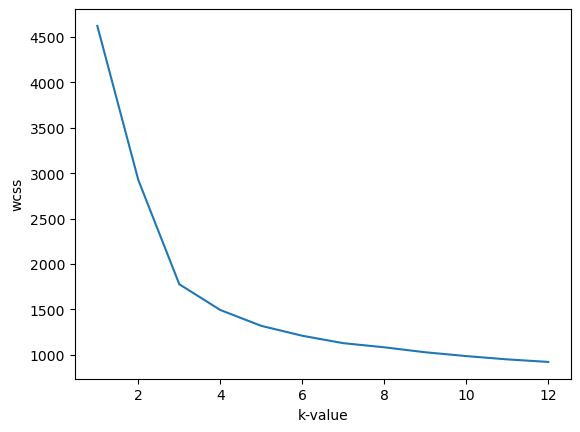

In [27]:
plt.plot(range(1,13),wcss)
plt.ylabel('wcss')
plt.xlabel('k-value')

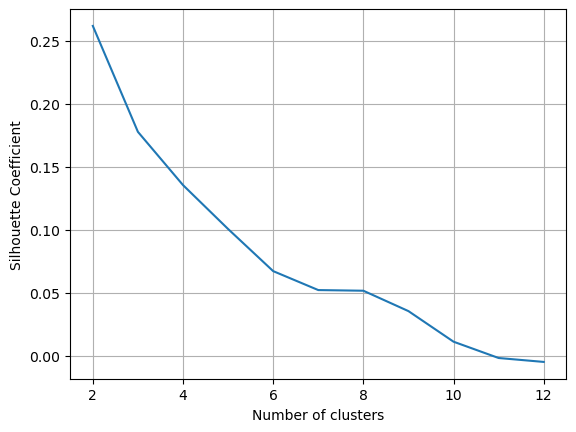

In [28]:
plt.plot(range(2,13),slh_score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [30]:
km1=KMeans(n_clusters=3)
km1.fit(scaled_data)
y=km1.predict(scaled_data)
ds['label']=y

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


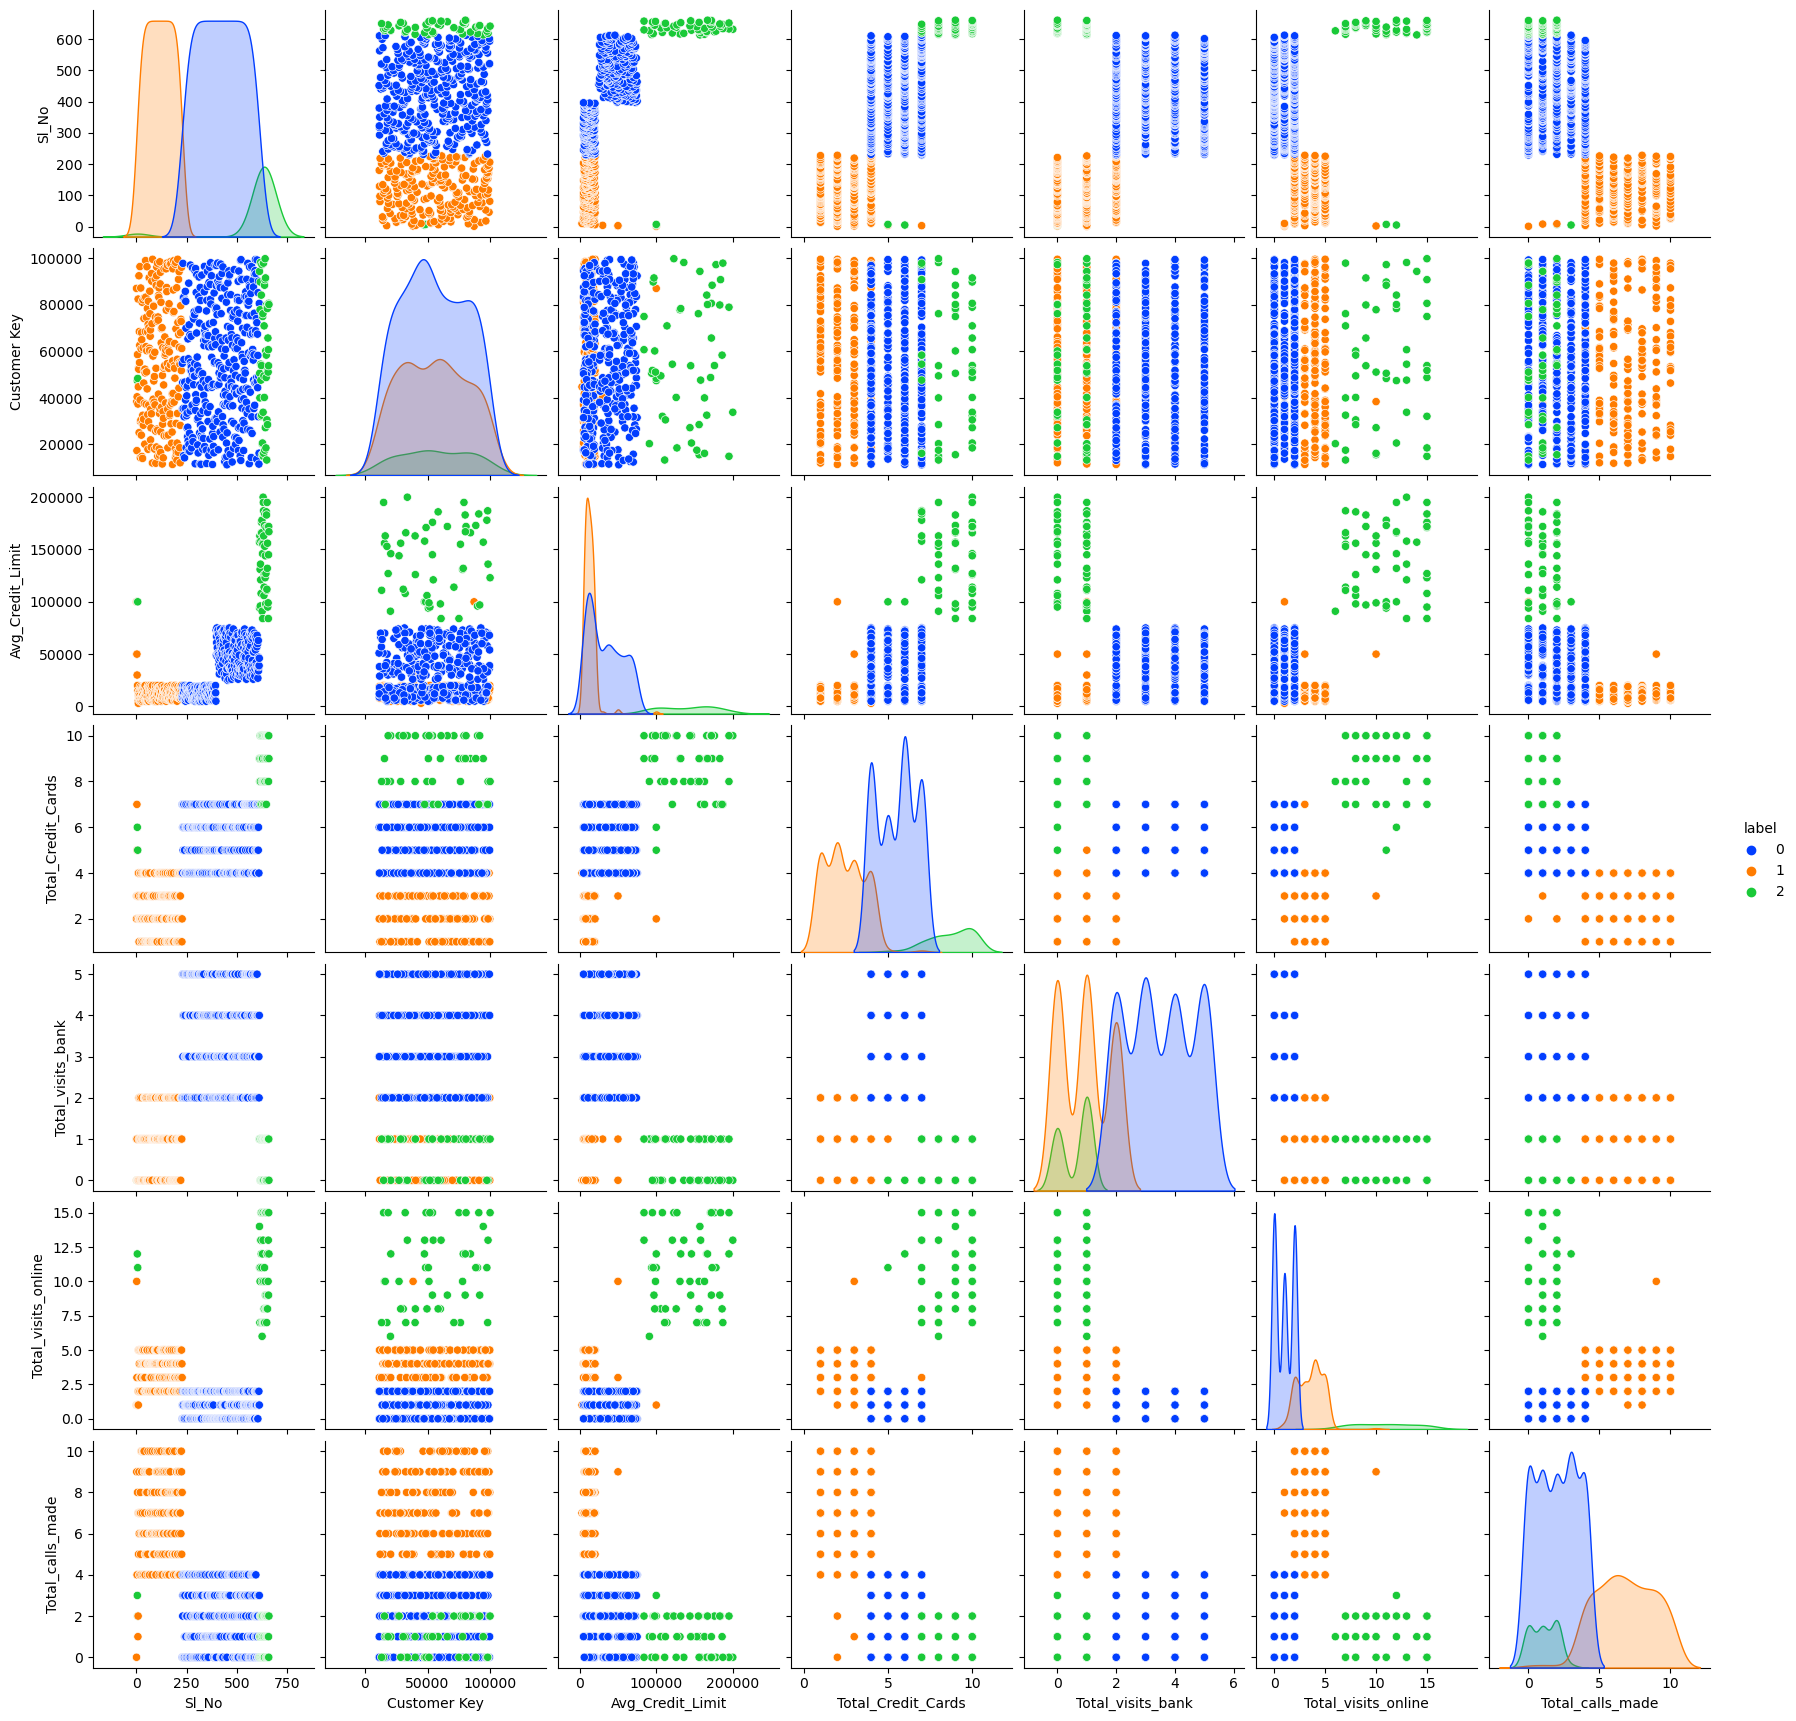

In [31]:
sns.pairplot(ds,hue='label',palette='bright')

In [32]:
center=km1.cluster_centers_
center

array([[ 4.72378035e-01, -6.39393835e-03, -2.83647816e-02,
         3.74929177e-01,  6.75943903e-01, -5.54591566e-01,
        -5.53004884e-01],
       [-1.12866766e+00, -2.67652094e-03, -5.78301453e-01,
        -1.04904475e+00, -9.03868692e-01,  3.16801726e-01,
         1.13305472e+00],
       [ 1.47371450e+00,  6.12033211e-02,  2.83176409e+00,
         1.86222621e+00, -1.10576269e+00,  2.82731942e+00,
        -8.74329826e-01]])

In [33]:
Kmean_silihoute=silhouette_score(scaled_data,km1.labels_)
Kmean_silihoute 

0.44394092525170764